In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("Pastel1")

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df_vcv = pd.read_csv("df_vcv.csv")
df_vcv.head()

,A,B,C,D,E,target
0,A0,0.0,0.0,D0,1.0,-2.963795
1,A0,0.0,0.0,D0,2.0,0.431221
2,A0,0.0,0.0,D0,3.0,0.368905
3,A0,0.0,0.0,D0,4.0,0.534808
4,A0,0.0,0.0,D1,1.0,1.779307


# Data

## normal split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# data split
df_trainval, df_test = train_test_split(df_vcv, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_trainval, train_size=0.75, random_state=42)

# index
idx_train = df_train.index
idx_val = df_val.index
idx_test = df_test.index

In [5]:
def plot_distribution(df, idx_train, idx_val, idx_test, filename):
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
    axs = axes.ravel()

    for ax, col in zip(axs, df.columns):
        if col != "target":
            if df[col].dtype == "O": # categorical
                df_train = df.loc[idx_train, col].value_counts().reset_index()
                df_val = df.loc[idx_val, col].value_counts().reset_index()
                df_test = df.loc[idx_test, col].value_counts().reset_index()

                width_cat = 0.8/3
                ax.bar(df_train.index-width_cat, df_train[col]/len(idx_train), width=width_cat, ec="g", fc="#AAFFAADD")
                ax.bar(df_val.index, df_val[col]/len(idx_val), width=width_cat, ec="c", fc="#AAFFFFDD")
                ax.bar(df_test.index+width_cat, df_test[col]/len(idx_test), width=width_cat, ec="m", fc="#FFAAFFDD")
                ax.set_xticks(list(range(df_train.shape[0])))
                ax.set_xticklabels(df_train["index"].values)

            else: # numerical
                bins = np.linspace(df[col].min(), df[col].max(), 10)
                bins_center = (bins[:-1] + bins[1:])/2
                bins_delta = bins[1] - bins[0]
                counts_train, bins_train = np.histogram(df.loc[idx_train, col], bins=bins)
                counts_val, bins_val = np.histogram(df.loc[idx_val, col], bins=bins)
                counts_test, bins_test = np.histogram(df.loc[idx_test, col], bins=bins)

                width_num = bins_delta/3
                ax.bar(bins_center-width_num, counts_train/len(idx_train), width=width_num, ec="g", fc="#AAFFAADD")
                ax.bar(bins_center, counts_val/len(idx_val), width=width_num, ec="g", fc="#AAFFFFDD")
                ax.bar(bins_center+width_num, counts_test/len(idx_test), width=width_num, ec="m", fc="#FFAAFFDD")

        else:
            sns.kdeplot(df.loc[idx_train, col], color="g", fill=True, ax=ax, label="train")
            sns.kdeplot(df.loc[idx_val, col], color="c", fill=True, ax=ax, label="val.")
            sns.kdeplot(df.loc[idx_test, col], color="m", fill=True, ax=ax, label="test")
            ax.set_ylabel("")

        if col in ["A", "D"]:
            coltype = "categorical"
        else:
            coltype = "numerical"

        ax.set_title(f"{col} ({coltype})", pad=12)

    handles, labels = axs[5].get_legend_handles_labels()
    axs[2].legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.9))    
    fig.tight_layout()
    fig.set_facecolor("w")
    fig.savefig(filename)

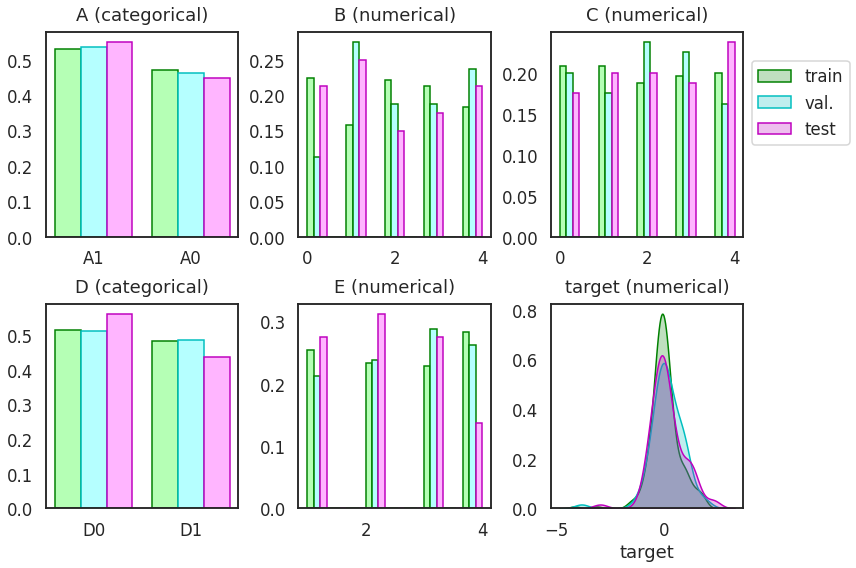

In [6]:
plot_distribution(df_vcv, idx_train, idx_val, idx_test, "68_vcv_1.png")

## stratified split

In [7]:
# stratify split fail
df_trainval, df_test = train_test_split(df_vcv, test_size=0.2, random_state=42,
                                        stratify=df_vcv[["B", "C", "E"]])

ValueError: The test_size = 80 should be greater or equal to the number of classes = 100

In [8]:
# stratify split success
df_trainval, df_test = train_test_split(df_vcv, test_size=0.2, random_state=42,
                                        stratify=df_vcv[["B", "C"]])
df_train, df_val = train_test_split(df_trainval, train_size=0.75, random_state=42,
                                        stratify=df_trainval[["B", "C"]])

# index
idx_train = df_train.index
idx_val = df_val.index
idx_test = df_test.index

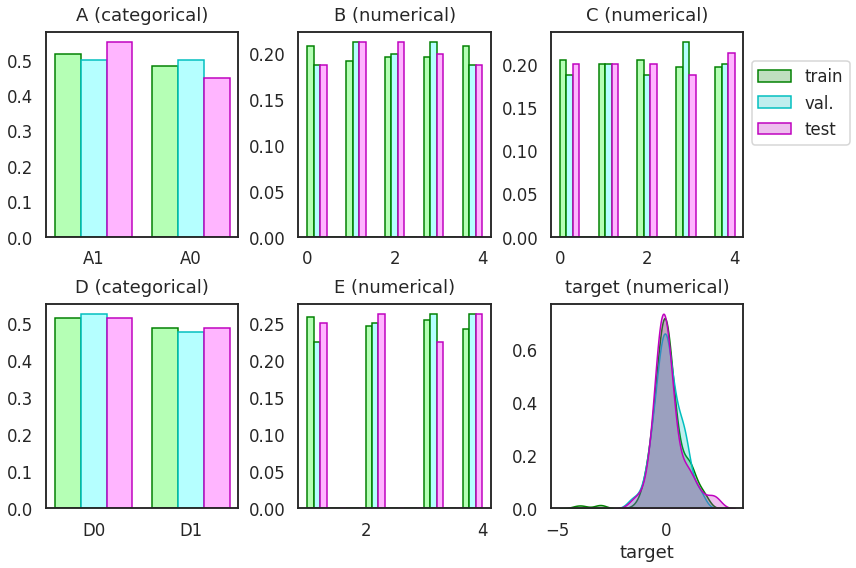

In [9]:
plot_distribution(df_vcv, idx_train, idx_val, idx_test, "68_vcv_2.png")

In [10]:
# quntizing E

qbins = np.quantile(df_vcv["E"], np.linspace(0, 1, 3))
qbins[0] = -np.inf
qbins[-1] = np.inf
print(qbins)

qlabels = np.arange(2)
print(qlabels)

[-inf  2.5  inf]
[0 1]


In [11]:
df_vcv["E_cat"] = pd.cut(df_vcv["E"], bins=qbins, labels=qlabels)
df_vcv.head()

,A,B,C,D,E,target,E_cat
0,A0,0.0,0.0,D0,1.0,-2.963795,0
1,A0,0.0,0.0,D0,2.0,0.431221,0
2,A0,0.0,0.0,D0,3.0,0.368905,1
3,A0,0.0,0.0,D0,4.0,0.534808,1
4,A0,0.0,0.0,D1,1.0,1.779307,0


In [12]:
# stratify split success
df_trainval, df_test = train_test_split(df_vcv, test_size=0.2, random_state=42,
                                        stratify=df_vcv[["B", "C", "E_cat"]])
df_train, df_val = train_test_split(df_trainval, train_size=0.75, random_state=42,
                                        stratify=df_trainval[["B", "C", "E_cat"]])

# index
idx_train = df_train.index
idx_val = df_val.index
idx_test = df_test.index

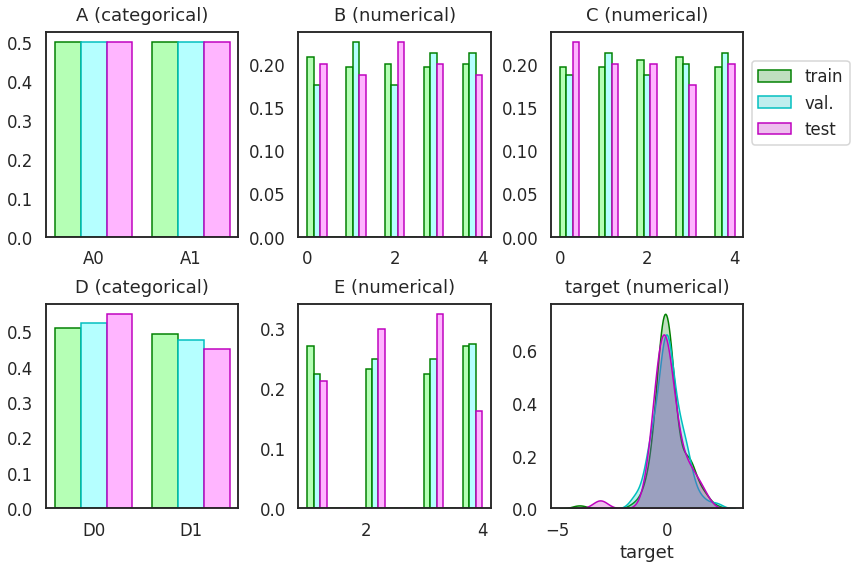

In [13]:
plot_distribution(df_vcv, idx_train, idx_val, idx_test, "68_vcv_3.png")

* **final split**

In [10]:
# stratify split success
df_trainval, df_test = train_test_split(df_vcv, test_size=0.2, random_state=42,
                                        stratify=df_vcv[["B", "C"]])
df_train, df_val = train_test_split(df_trainval, train_size=0.75, random_state=42,
                                        stratify=df_trainval[["B", "C"]])

# index
idx_train = df_train.index
idx_val = df_val.index
idx_test = df_test.index

# dataset
X = df_vcv[["A", "B", "C", "D", "E"]]
y = df_vcv["target"]

X_train, X_val, X_test = X.loc[idx_train], X.loc[idx_val], X.loc[idx_test]
y_train, y_val, y_test = y[idx_train], y[idx_val], y[idx_test]

# ML

## preparation

### Pipeline

In [11]:
# encoder
from sklearn.preprocessing import OneHotEncoder

# machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
# machine learning models
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

In [13]:
def get_model(method="svr", param=None):
    
    # categorical and numerical features
    cat_features = ["A", "D"]
    cat_transformer = OneHotEncoder(sparse=False)

    num_features = ["B", "C", "E"]
    num_transformer = Pipeline(steps=[("scaler", StandardScaler()),
                                      ("polynomial", PolynomialFeatures(include_bias=True))])

    # preprocessor
    preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                                   ("cat", cat_transformer, cat_features)
                                                  ])

    # modeling
    if method == "svr":
        model = Pipeline(steps=[("preprocessor", preprocessor), 
                                ("svr", SVR())
                               ])
    elif method == "kridge":
        model = Pipeline(steps=[("preprocessor", preprocessor), 
                                ("kridge", KernelRidge())
                               ])
    elif method == "knr":
        model = Pipeline(steps=[("preprocessor", preprocessor), 
                                ("knr", KNeighborRegressor())
                               ])
        
    model.set_params(**param)
    return model

In [14]:
# example: svr

param = {'preprocessor__num__polynomial__degree': 3, 
         'svr__kernel': 'rbf', 'svr__C': 100, 'svr__gamma': 0.01}

model = get_model(method="svr", param=param)

In [15]:
from sklearn import set_config

set_config(display='diagram')  
display(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['B', 'C', 'E']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['A', 'D'])])),
                ('svr', SVR(C=100, gamma=0.01))])

### evaluation

In [16]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error as mae_
from sklearn.metrics import mean_squared_error as mse_
from sklearn.metrics import r2_score as r2_

In [17]:
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    mae = mae_(y, y_pred)
    rmse = mse_(y, y_pred, squared=False)
    r2 = r2_(y, y_pred)
    
    return y_pred, mae, rmse, r2

In [18]:
model.fit(X_train, y_train)
y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
print(f"#  mae_val : {mae_val:.3f}")
print(f"# rmse_val : {rmse_val:.3f}")
print(f"#   r2_val : {r2_val:.3f}")

#  mae_val : 0.296
# rmse_val : 0.437
#   r2_val : 0.513


### Parity Plots

In [19]:
def plot_parity(true, predict, c="c", mae=None, rmse=None, r2=None, 
                equal=True, title=None, xlabel="true", ylabel="predict", ax=None):
    # if axes not defined, create one.
    if not ax:
        fig, ax = plt.subplots(figsize=(4, 4))
    
    # scatter plot
    ax.scatter(true, predict, c=c, s=10, alpha=0.3)
    
    # x, y limits
    min_ = min(ax.get_xbound()[0], ax.get_ybound()[0])
    max_ = max(ax.get_xbound()[1], ax.get_ybound()[1])
    ax.set_xlim(min_, max_)
    ax.set_ylim(min_, max_)
    
    # x, y ticks
    lb, ub = ax.get_ybound()
    
    ticks =[x for x in ax.get_xticks() if x >= lb and x <= ub]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)
    
    # grids
    ax.set_aspect("equal")
    ax.grid(axis="both", c="lightgray")
    if equal:
        ax.plot([lb, ub], [lb, ub], c="k", alpha=0.3)
    
    # x, y labels and title
    ax.set_xlabel(xlabel, fontsize=16, labelpad=8)
    ax.set_ylabel(ylabel, fontsize=16, labelpad=8)
    ax.set_title(title, fontsize=16, pad=8)
    
    # metrics
    if mae:
        ax.text(0.95, 0.3, f" MAE ={mae:0.3f}",
                transform=ax.transAxes, fontsize=16, ha="right")
    if rmse:
        ax.text(0.95, 0.22, f"RMSE ={rmse:0.3f}", 
                transform=ax.transAxes, fontsize=16, ha="right")
    if r2:
        ax.text(0.95, 0.14, f"R2 ={r2:0.3f}", 
                transform=ax.transAxes, fontsize=16, ha="right")
    
    return ax

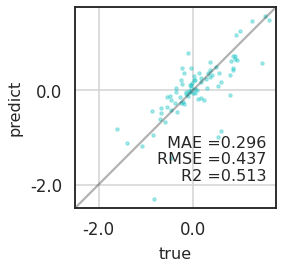

In [20]:
ax = plot_parity(y_val, y_pred_val, mae=mae_val, rmse=rmse_val, r2=r2_val)
fig = ax.figure
fig.tight_layout()
fig.set_facecolor("w")
fig.savefig("68_vcv_5.png")

In [21]:
def plot_parities(model, X_train, y_train, X_val=None, y_val=None, X_test=None, y_test=None, title=None, train=False):
    
    # validataion and test
    vis_val = False
    if (X_val is not None) and (y_val is not None):
        vis_val = True
        
    vis_test = False
    if (X_test is not None) and (y_test is not None):
        vis_test = True
    
    # train
    if train:
        model.fit(X_train, y_train)
        
    # prediction and get_metrics
    y_pred_train, mae_train, rmse_train, r2_train = get_metrics(model, X_train, y_train)
    
    if vis_val:
        y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
        
    if vis_test:
        X_trainval = pd.concat([X_train, X_val], axis=0)
        y_trainval = pd.concat([y_train, y_val], axis=0)
        model.fit(X_trainval, y_trainval)
        y_pred_test, mae_test, rmse_test, r2_test = get_metrics(model, X_test, y_test)
        
    # figure preparation
    ncols = 1
    if vis_val:
        ncols += 1
    if vis_test:
        ncols += 1
        
    ax_width = 5
    if ncols > 1:
        ax_width = 4
    
    fig, axs = plt.subplots(ncols=ncols, figsize=(ax_width*ncols, 5), sharex=True, sharey=True)
    if not isinstance(axs, np.ndarray):
        axs = [axs]
    
    c_train, c_val, c_test = "g", "c", "m"
    
    axs[0] = plot_parity(y_train, y_pred_train, c=c_train, mae=mae_train, rmse=rmse_train, r2=r2_train, 
                         title="train", ax=axs[0])
    mins = [axs[0].get_xbound()[0]]
    maxs = [axs[0].get_xbound()[1]]
    
    if vis_val:
        axs[1] = plot_parity(y_val, y_pred_val, c=c_val, mae=mae_val, rmse=rmse_val, r2=r2_val, 
                             ylabel=None, title="validation", ax=axs[1])
        mins.append(axs[1].get_xbound()[0])
        maxs.append(axs[1].get_xbound()[1])   
    
    if vis_test:
        axs[2] = plot_parity(y_test, y_pred_test, c=c_test, mae=mae_test, rmse=rmse_test, r2=r2_test, 
                             ylabel=None, title="test (train by full trainset)", ax=axs[2])
        mins.append(axs[2].get_xbound()[0])
        maxs.append(axs[2].get_xbound()[1])
        
    # suptitle
    if title:
        fig.suptitle(title, fontsize=20, ha="center")
    
    fig.tight_layout()
    fig.set_facecolor("w")
    
    if title:
        fig.savefig(f"{title.replace('(', '_').replace(')', '_').replace(':', '_')}.png")

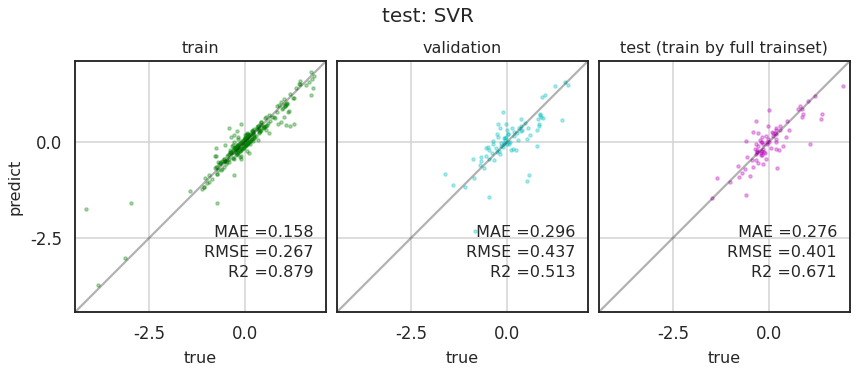

In [22]:
plot_parities(model, X_train, y_train, X_val, y_val, X_test, y_test, 
              title="test: SVR", train=True)

### grid search

In [27]:
from itertools import product

def gs_model(X_train, y_train, X_val, y_val, method="svr", param_grid=None):
    
    # param_grid
    param_ks = param_grid.keys()
    param_vs = list(product(*param_grid.values()))
    
    df = pd.DataFrame(columns=list(param_ks)
                      + ["mae_train", "mae_val", "rmse_train", "rmse_val", "r2_train", "r2_val"]
                      + ["y_pred_train", "y_pred_val"])
    
    for i, vs in enumerate(param_vs):
        param = dict(zip(param_ks, vs))
        
        model = get_model(method=method, param=param)
        
        # train
        model.fit(X_train, y_train)
        
        # evaluation
        y_pred_train, mae_train, rmse_train, r2_train = get_metrics(model, X_train, y_train)
        y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
        
        # output
        df.loc[i] = list(vs) + [mae_train, mae_val, 
                                rmse_train, rmse_val, 
                                r2_train, r2_val, 
                                y_pred_train, y_pred_val]
    
    return df

{'preprocessor__num__polynomial__degree': 2, 'svr__kernel': 'rbf', 'svr__C': 1.0, 'svr__gamma': 0.1, 'svr__coef0': 0}


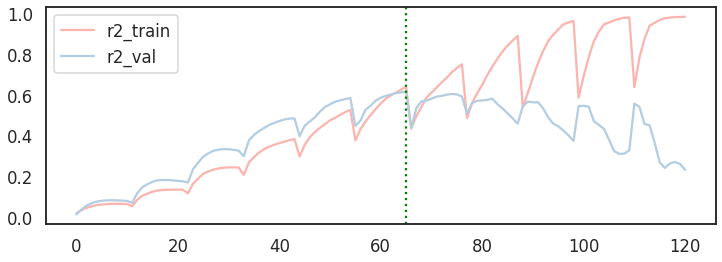

In [28]:
param_grid = {'preprocessor__num__polynomial__degree': [2],
              'svr__kernel': ['rbf'], #['linear', 'poly', 'rbf', 'sigmoid'],
              'svr__C': np.logspace(-2, 2, 11),
              'svr__gamma': np.linspace(0.01, 0.1, 11),
              'svr__coef0': [0]}

df_svr = gs_model(X_train, y_train, X_val, y_val, method="svr", param_grid=param_grid)

# sort
df_sort = df_svr.sort_values("r2_val", ascending=False)

# best params
best_params = df_sort[list(param_grid.keys())].iloc[0].to_dict()
best_params_idx = df_sort.index[0]
print(best_params)

# train vs validation plot
ax = df_svr[["r2_train", "r2_val"]].plot(figsize=(12, 4))
ax.axvline(best_params_idx, c="g", ls=":")
fig = ax.figure
fig.set_facecolor("w")
fig.savefig("68_vcv_6.png")

In [29]:
df_sort.head()

,preprocessor__num__polynomial__degree,svr__kernel,svr__C,svr__gamma,svr__coef0,mae_train,mae_val,rmse_train,rmse_val,r2_train,r2_val,y_pred_train,y_pred_val
65,2,rbf,1.000000,0.100,0,0.222909,0.279660,0.460926,0.388856,0.639937,0.615001,"[-0.541040213670464, -0.7752892328448793, 0.03...","[0.27528327695594434, 0.4571615431694553, -0.2..."
64,2,rbf,1.000000,0.091,0,0.230141,0.281783,0.470038,0.389973,0.625561,0.612787,"[-0.5412574936999535, -0.7256959360920834, -0....","[0.27922358436495026, 0.4464112563311981, -0.2..."
63,2,rbf,1.000000,0.082,0,0.237698,0.284176,0.479011,0.392172,0.611129,0.608407,"[-0.5456006689314037, -0.6665015108051211, -0....","[0.2827039196767842, 0.4377858041863346, -0.25..."
74,2,rbf,2.511886,0.082,0,0.197942,0.275331,0.413283,0.394057,0.710525,0.604634,"[-0.5410668929675319, -0.8348185499768221, 0.2...","[0.2319105388952969, 0.4804581658607189, -0.10..."
75,2,rbf,2.511886,0.091,0,0.190586,0.276379,0.397657,0.395045,0.732001,0.602649,"[-0.5408455275083537, -0.8348516538906736, 0.2...","[0.2393122317346637, 0.48032932422319957, -0.0..."


In [30]:
def plot_gs(X_train, y_train, X_val, y_val, method="svr", param_grid=None, filename=None):
    df = gs_model(X_train, y_train, X_val, y_val, method=method, param_grid=param_grid)
    df_sort = df.sort_values("r2_val", ascending=False)
    
    # best params
    best_params = df_sort[list(param_grid.keys())].iloc[0].to_dict()
    best_params_idx = df_sort.index[0]
    print(best_params)
    
    # train vs validation plot
    ax = df_svr[["r2_train", "r2_val"]].plot(figsize=(12, 4))
    ax.axvline(best_params_idx, c="g", ls=":")
    fig = ax.figure
    fig.set_facecolor("w")
    
    if filename:
        fig.savefig(filename)
        
    return best_params

{'preprocessor__num__polynomial__degree': 2, 'svr__kernel': 'rbf', 'svr__C': 1.0, 'svr__gamma': 0.1, 'svr__coef0': 0}
CPU times: user 8.74 s, sys: 39 ms, total: 8.78 s
Wall time: 8.76 s


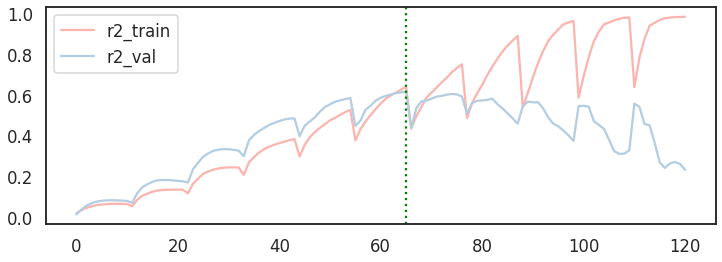

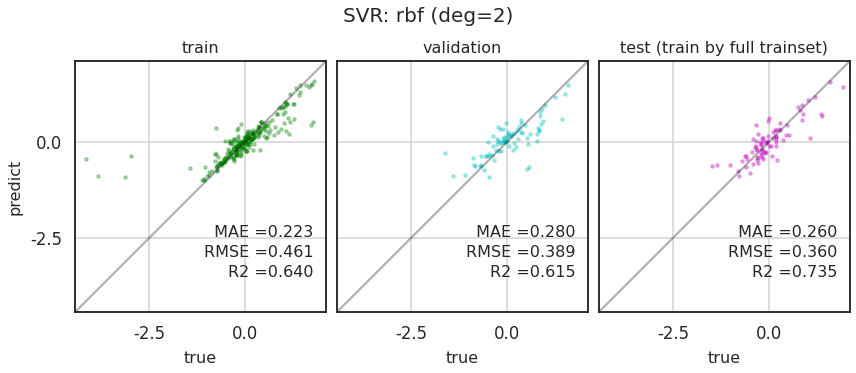

In [31]:
%%time
best_params = plot_gs(X_train, y_train, X_val, y_val, method="svr", param_grid=param_grid, filename="68_vcv_6.png")

model = get_model(method="svr", param=best_params)
plot_parities(model, X_train, y_train, X_val, y_val, X_test, y_test, 
              title="SVR: rbf (deg=2)", train=True)

### scikit-learn optimizer

In [32]:
# !pip install scikit-optimize

In [23]:
#https://medium.com/@vincent.kr18/hyper-parameter-tuning-using-bayesian-optimisation-code-b50e0e8abe20
    
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

In [24]:
space = [Integer(1, 2, name="preprocessor__num__polynomial__degree"),
         Categorical(["rbf"], name="svr__kernel"),
         Real(0.01, 100, "log-uniform", name="svr__C"),
         Real(0.01, 0.1, "uniform", name="svr__gamma"),
         Integer(0, 1, name="svr__coef0")
        ]

In [25]:
@use_named_args(space)
def objective(**params):
    model = get_model(method="svr", param=params)
    model.fit(X_train, y_train)
    y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
    
    return -r2_val

In [26]:
%%time

from skopt import gp_minimize

model_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print(f"best score = {model_gp.fun:.4f}")

best score = -0.6193
CPU times: user 1min 25s, sys: 10.5 s, total: 1min 36s
Wall time: 28.6 s


In [27]:
model_gp.x

[2, 'rbf', 0.7740303218260096, 0.1, 1]

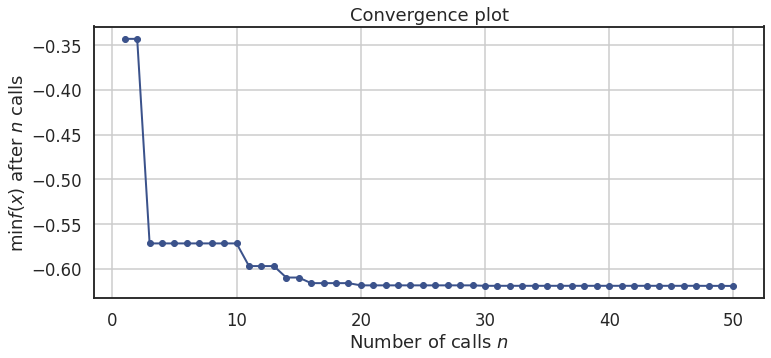

In [28]:
from skopt.plots import plot_convergence

ax = plot_convergence(model_gp)
fig = ax.figure
fig.set_facecolor("w")
fig.set_figheight(5)
fig.set_figwidth(12)
fig.savefig("68_vcv_7.png")

{'preprocessor__num__polynomial__degree': 2, 'svr__kernel': 'rbf', 'svr__C': 0.7740303218260096, 'svr__gamma': 0.1, 'svr__coef0': 1}


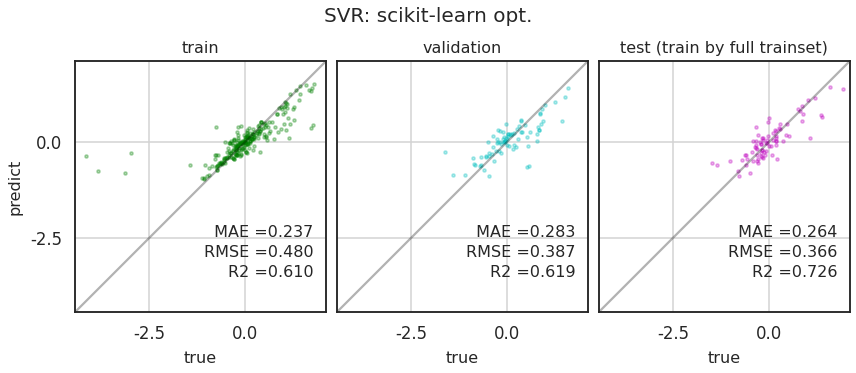

In [29]:
param_keys = [s.name for s in space]
best_params = dict(zip(param_keys, model_gp.x))
print(best_params)

model = get_model(method="svr", param=best_params)
plot_parities(model, X_train, y_train, X_val, y_val, X_test, y_test, 
              title="SVR: scikit-learn opt.", train=True)

## Optimization

In [44]:
def run_skopt(objective, space, method="svr", n_calls=50, filename_conv=None, filename_parity=None, figsize=(12, 5)):
    
    # scikit optimization
    model_gp = gp_minimize(objective, space, n_calls=n_calls, random_state=0)
    print(f"best score = {model_gp.fun:.4f}")

    # convergence plot
    ax = plot_convergence(model_gp)
    fig = ax.figure
    fig.set_facecolor("w")
    fig.set_figheight(figsize[1])
    fig.set_figwidth(figsize[0])
    fig.savefig(filename_conv)

    # best parameters
    param_keys = [s.name for s in space]
    best_params = dict(zip(param_keys, model_gp.x))
    print(f"best parameters= {best_params}")
    
    # train, val and test result 
    best_model = get_model(method=method, param=best_params)
    plot_parities(best_model, X_train, y_train, X_val, y_val, X_test, y_test, 
                  title=filename_parity, train=True)
    
    return best_model, best_params

### SVR

#### rbf

In [41]:
#space
space = [Integer(1, 2, name="preprocessor__num__polynomial__degree"),
         Categorical(["rbf"], name="svr__kernel"),
         Real(0.001, 1000, "log-uniform", name="svr__C"),
         Real(1e-3, 10, "log-uniform", name="svr__gamma"),
        ]

In [42]:
#objective

@use_named_args(space)
def objective(**params):
    model = get_model(method="svr", param=params)
    model.fit(X_train, y_train)
    y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
    
    return -r2_val

best score = -0.5958
best parametes= {'preprocessor__num__polynomial__degree': 2, 'svr__kernel': 'rbf', 'svr__C': 3.6849489591579174, 'svr__gamma': 0.06392886882245565}
CPU times: user 2min 30s, sys: 16.7 s, total: 2min 46s
Wall time: 1min


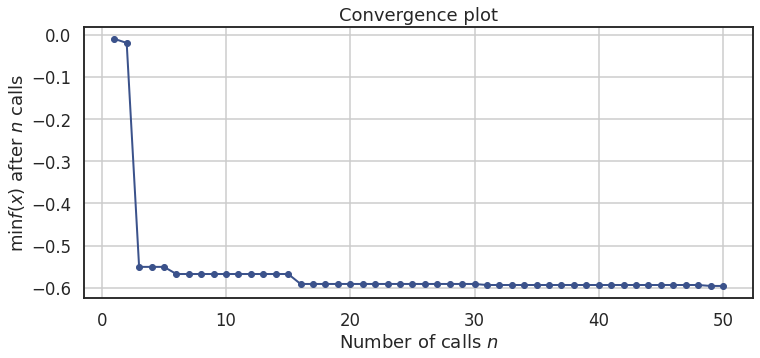

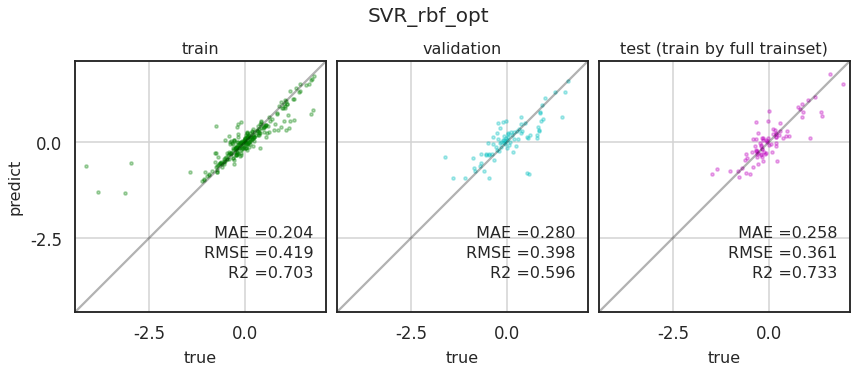

In [43]:
%%time

best_svr_rbf, best_params = run_skopt(objective, space, n_calls=50, 
                                      filename_conv="68_vcv_8.png", 
                                      filename_parity="SVR_rbf_opt", figsize=(12, 5))

#### sigmoid

In [54]:
#space
space = [Integer(1, 2, name="preprocessor__num__polynomial__degree"),
         Categorical(["sigmoid"], name="svr__kernel"),
         Real(0.001, 1000, "log-uniform", name="svr__C"),
         Real(0.001, 1000, "log-uniform", name="svr__gamma"),
         Integer(1, 3, "uniform", name="svr__coef0"),
        ]

In [55]:
#objective

@use_named_args(space)
def objective(**params):
    model = get_model(method="svr", param=params)
    model.fit(X_train, y_train)
    y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
    
    return -r2_val

best score = -0.4026
best parametes= {'preprocessor__num__polynomial__degree': 2, 'svr__kernel': 'sigmoid', 'svr__C': 35.61998612311098, 'svr__gamma': 0.004319620992854352, 'svr__coef0': 2}
CPU times: user 1min 56s, sys: 13.1 s, total: 2min 10s
Wall time: 49.6 s


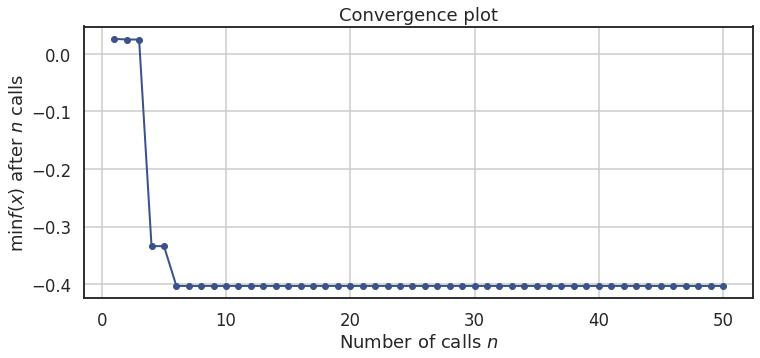

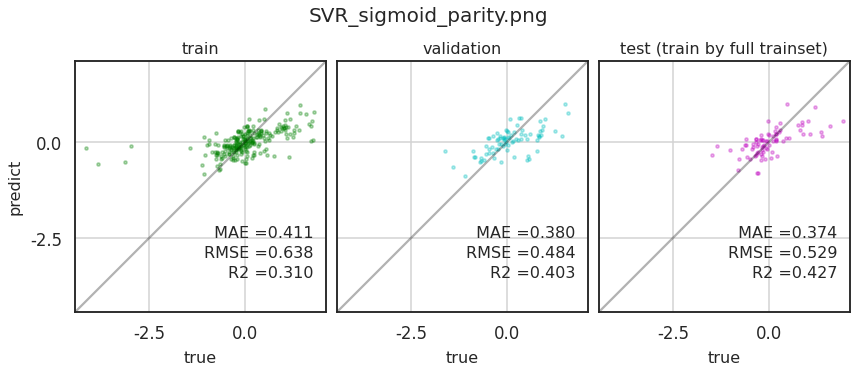

In [56]:
%%time

best_svr_sigmoid, best_params = run_skopt(objective, space, n_calls=50, 
                                          filename_conv="68_vcv_9.png", 
                                          filename_parity="SVR_sigmoid_parity.png", figsize=(12, 5))

#### poly

In [58]:
#space
space = [Integer(1, 2, name="preprocessor__num__polynomial__degree"),
         Categorical(["poly"], name="svr__kernel"),
         Real(0.001, 1000, "log-uniform", name="svr__C"),
         Real(0.001, 1000, "log-uniform", name="svr__gamma"),
         Integer(1, 3, "uniform", name="svr__coef0"),
         Integer(1, 3, "uniform", name="svr__degree"),
        ]

In [59]:
#objective

@use_named_args(space)
def objective(**params):
    model = get_model(method="svr", param=params)
    model.fit(X_train, y_train)
    y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
    
    return -r2_val

In [ ]:
%%time

best_svr_poly, best_params = run_skopt(objective, space, n_calls=50, 
                                       filename_conv="68_vcv_9.png", 
                                       filename_parity="SVR_poly_opt.png", figsize=(12, 5))

### Kernel Ridge

#### rbf

In [55]:
#space
space = [Integer(1, 3, name="preprocessor__num__polynomial__degree"),
         Categorical(["rbf"], name="kridge__kernel"),
         Real(1e-3, 10, "log-uniform", name="kridge__gamma"),
         Real(1, 3, name="kridge__degree"),
         Real(1e-4, 100, "log-uniform", name="kridge__alpha")
        ]

In [56]:
#objective
@use_named_args(space)
def objective(**params):
    model = get_model(method="kridge", param=params)
    model.fit(X_train, y_train)
    y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
    
    return -r2_val

best score = -0.5656
best parametes= {'preprocessor__num__polynomial__degree': 2, 'kridge__kernel': 'rbf', 'kridge__gamma': 0.2117990683699694, 'kridge__degree': 3.0, 'kridge__alpha': 0.5535982778582595}
CPU times: user 1min 56s, sys: 14.1 s, total: 2min 10s
Wall time: 36.9 s


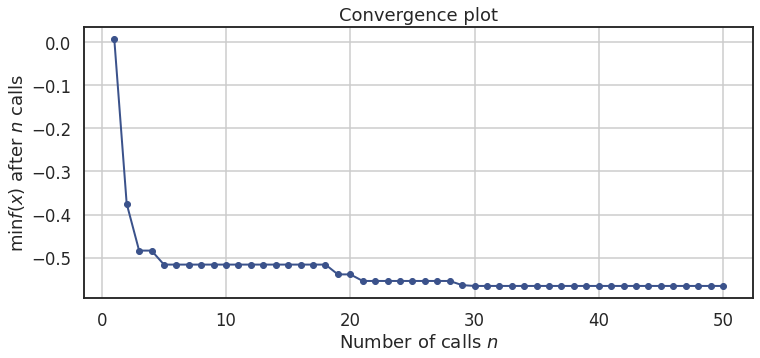

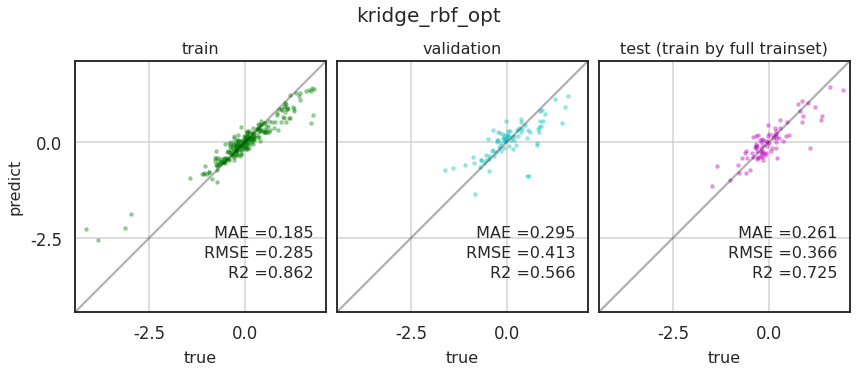

In [57]:
%%time

best_model, best_params = run_skopt(objective, space, method="kridge", n_calls=50, 
                                    filename_conv="68_vcv_10.png", 
                                    filename_parity="kridge_rbf_opt", figsize=(12, 5))

#### laplacian

In [52]:
#space
space = [Integer(1, 3, name="preprocessor__num__polynomial__degree"),
         Categorical(["laplacian"], name="kridge__kernel"),
         Real(1e-3, 10, "log-uniform", name="kridge__gamma"),
         Real(1e-4, 100, "log-uniform", name="kridge__alpha")
        ]

In [53]:
#objective
@use_named_args(space)
def objective(**params):
    model = get_model(method="kridge", param=params)
    model.fit(X_train, y_train)
    y_pred_val, mae_val, rmse_val, r2_val = get_metrics(model, X_val, y_val)
    
    return -r2_val

best score = -0.5706
best parametes= {'preprocessor__num__polynomial__degree': 3, 'kridge__kernel': 'laplacian', 'kridge__gamma': 0.12652487288519831, 'kridge__alpha': 0.05339125699845363}
CPU times: user 1min 55s, sys: 14.1 s, total: 2min 9s
Wall time: 38.7 s


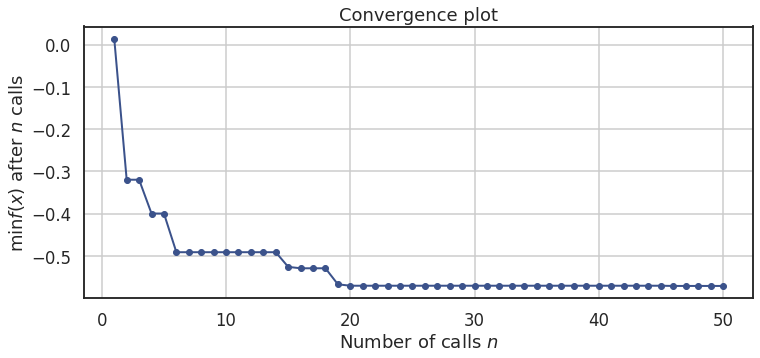

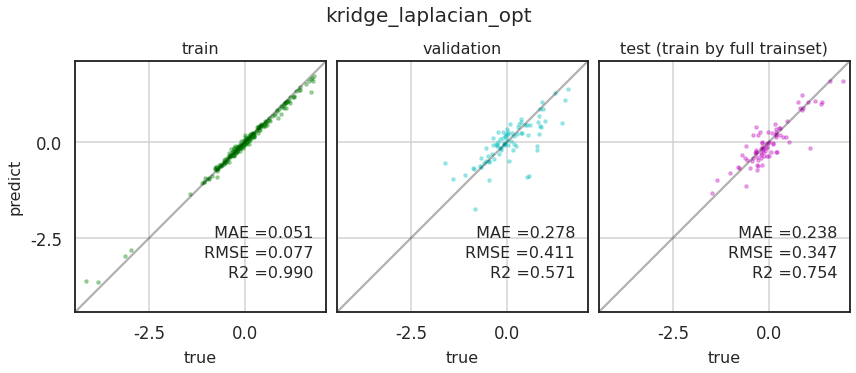

In [54]:
%%time

best_model, best_params = run_skopt(objective, space, method="kridge", n_calls=50, 
                                    filename_conv="68_vcv_10.png", 
                                    filename_parity="kridge_laplacian_opt", figsize=(12, 5))